In [9]:
!nvidia-smi

Fri Sep 27 14:15:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   49C    P8              7W /   75W |    1046MiB /   4096MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
import os
HOME = os.getcwd()
print(HOME)

d:\Workspace\TreasureHunter\treasure-hunter-train\datasets


### Install YOLOv8

In [11]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)
    print("Device name:", torch.cuda.get_device_name(0))

PyTorch version: 2.4.1+cu121
Torchvision version: 0.19.1+cu121
CUDA available: True
CUDA version: 12.1
Device name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [12]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

# Ensure that the GPU is being used
import torch
if torch.cuda.is_available():
    print("Running on GPU")
else:
    print("GPU not available, running on CPU")

Ultralytics YOLOv8.0.196  Python-3.12.6 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (16 CPUs, 23.6 GB RAM, 40.5/48.8 GB disk)


Running on GPU


In [13]:
from ultralytics import YOLO
from IPython.display import display, Image

In [14]:
import shutil
import os

# Delete the old folder if it exists
old_folder = os.path.join(HOME, 'datasets')
if os.path.exists(old_folder):
    shutil.rmtree(old_folder)

# Create a new folder
os.makedirs(old_folder, exist_ok=True)
%cd {old_folder}

%pip install --user roboflow --quiet
%pip install --user albumentations==1.4

from roboflow import Roboflow
rf = Roboflow(api_key="KHaj7EcwyJOWjWNSWyiC")
project = rf.workspace("hotaai").project("hotaai")
version = project.version(1)
dataset = version.download("yolov8")
                
                


d:\Workspace\TreasureHunter\treasure-hunter-train\datasets\datasets
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Treasure-Hunter-6 in yolov8:: 100%|██████████| 116/116 [00:00<00:00, 2587.78it/s]


In [25]:
import shutil
shutil.rmtree(os.path.join(HOME, 'runs'), ignore_errors=True)
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=800 plots=True device=0


d:\Workspace\TreasureHunter\treasure-hunter-train\datasets


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, m

d:\Workspace\TreasureHunter\treasure-hunter-train\datasets


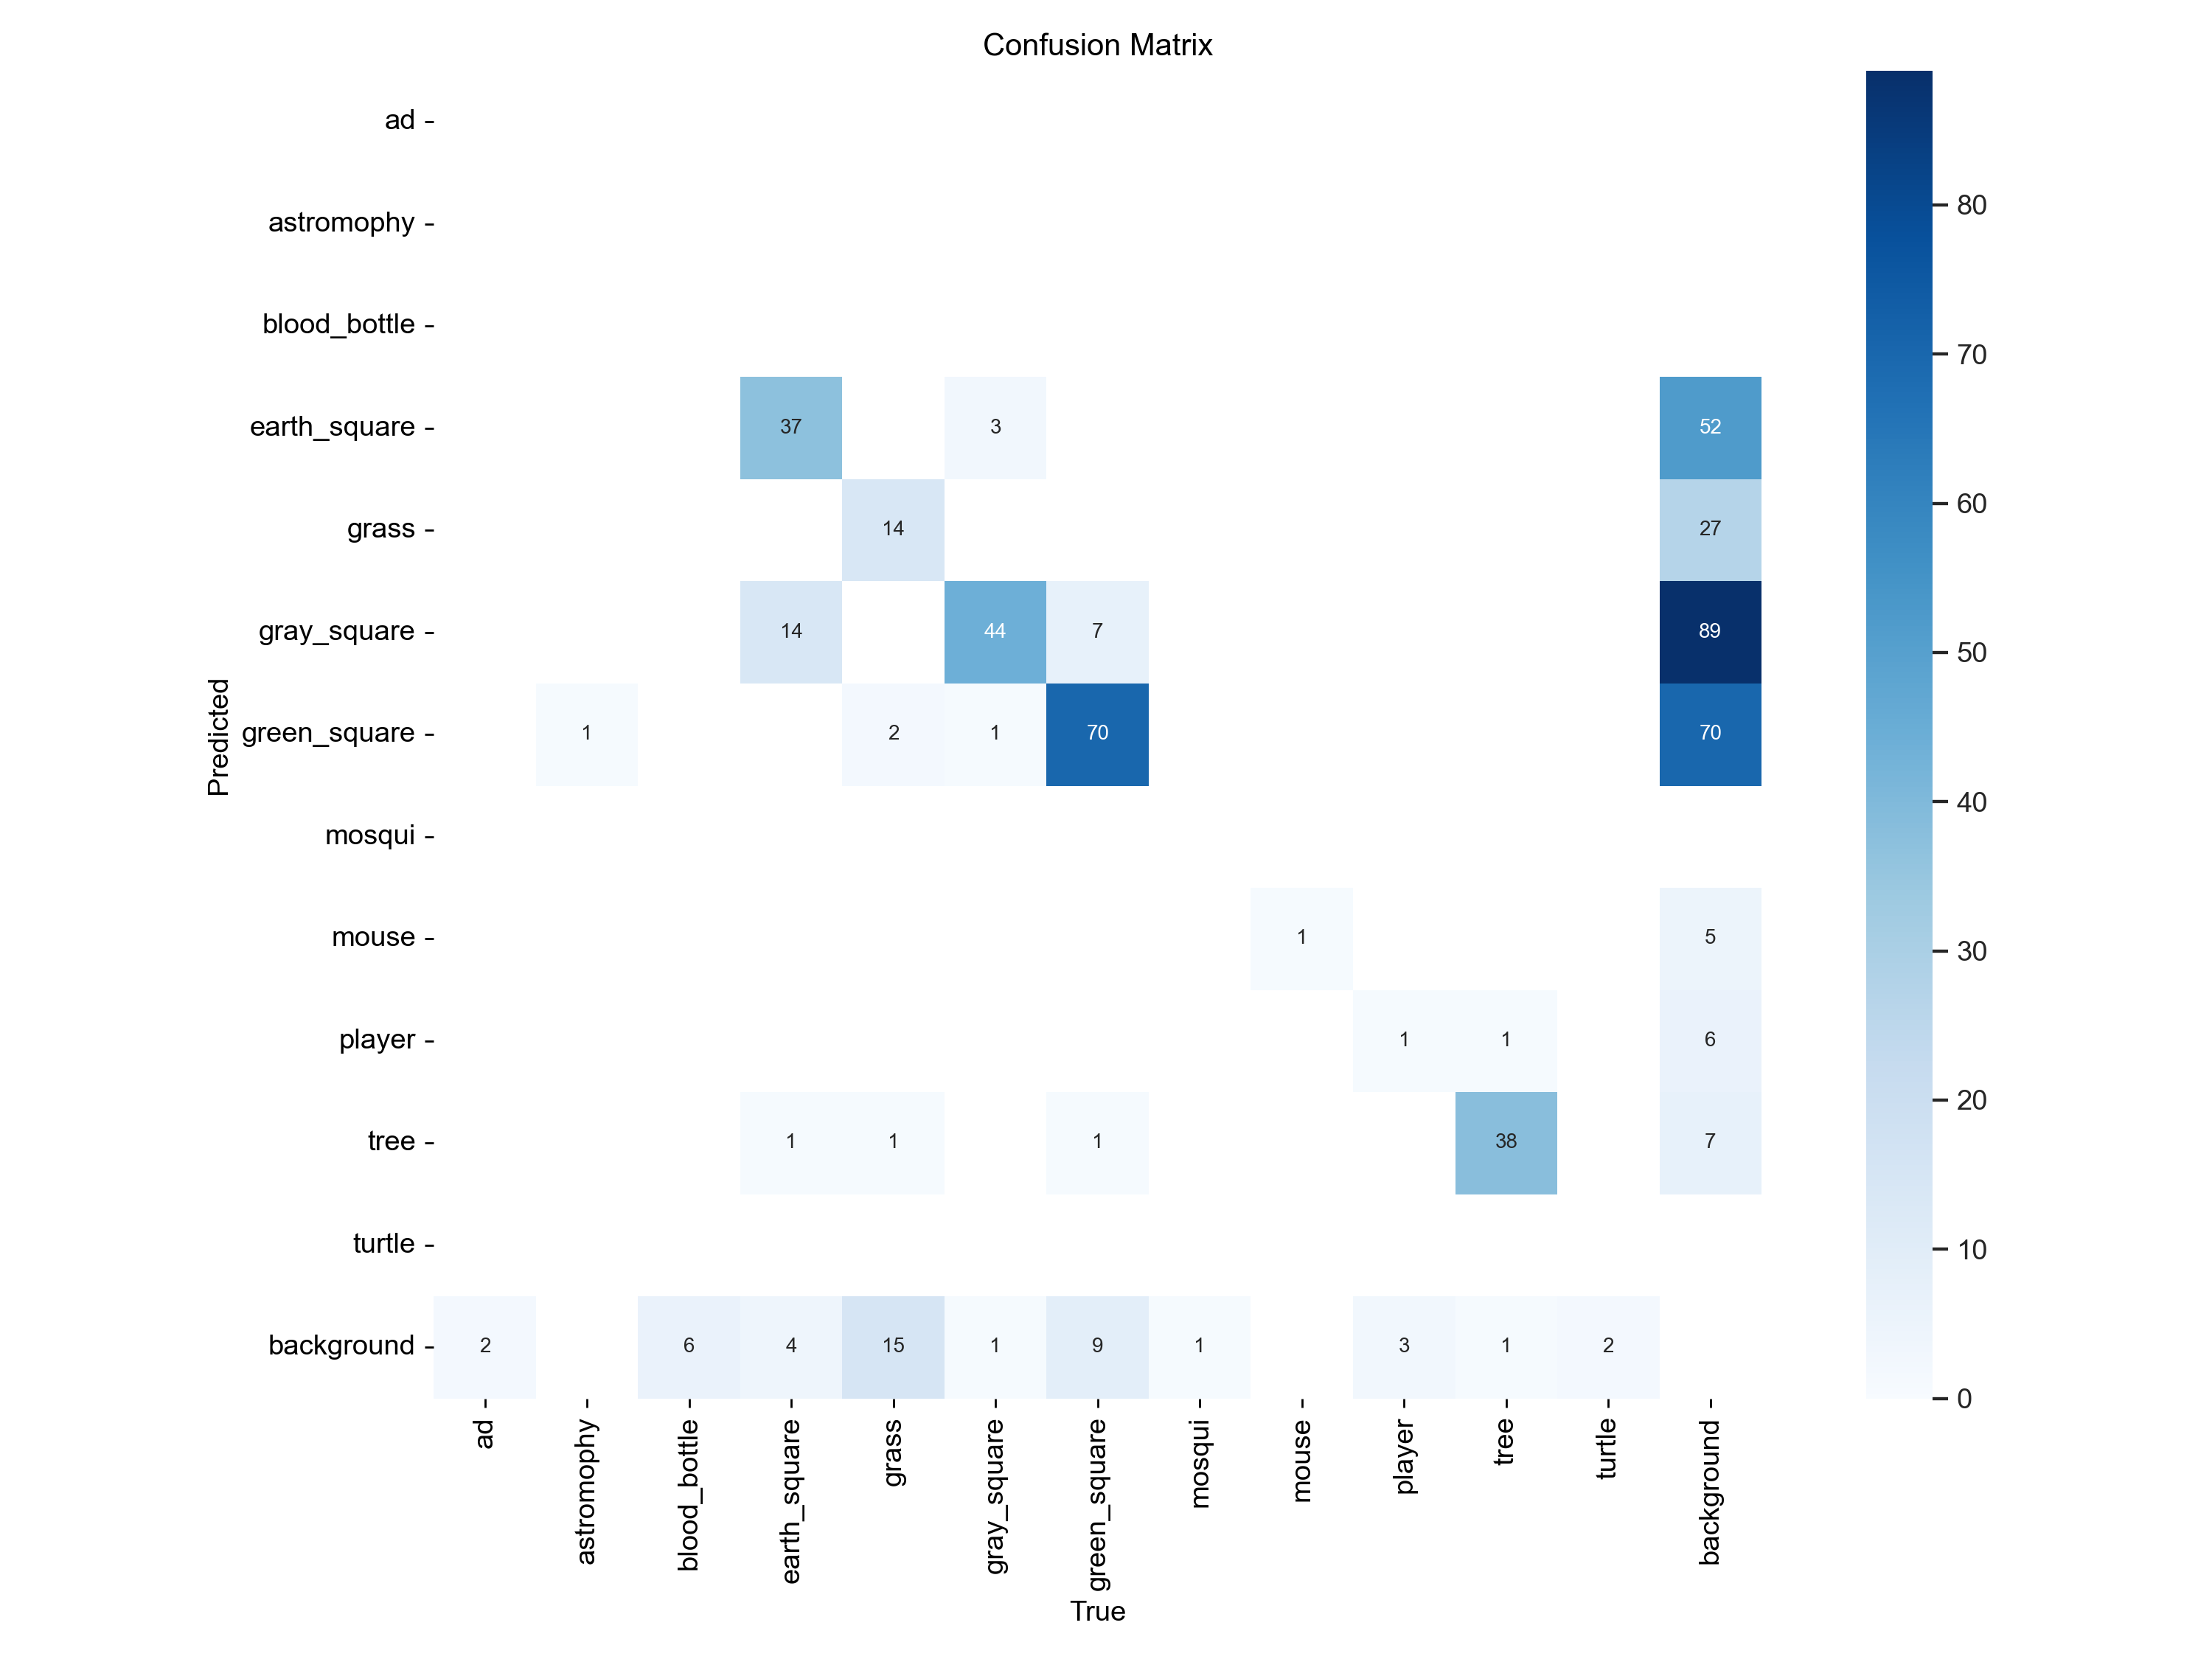

In [20]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

d:\Workspace\TreasureHunter\treasure-hunter-train\datasets


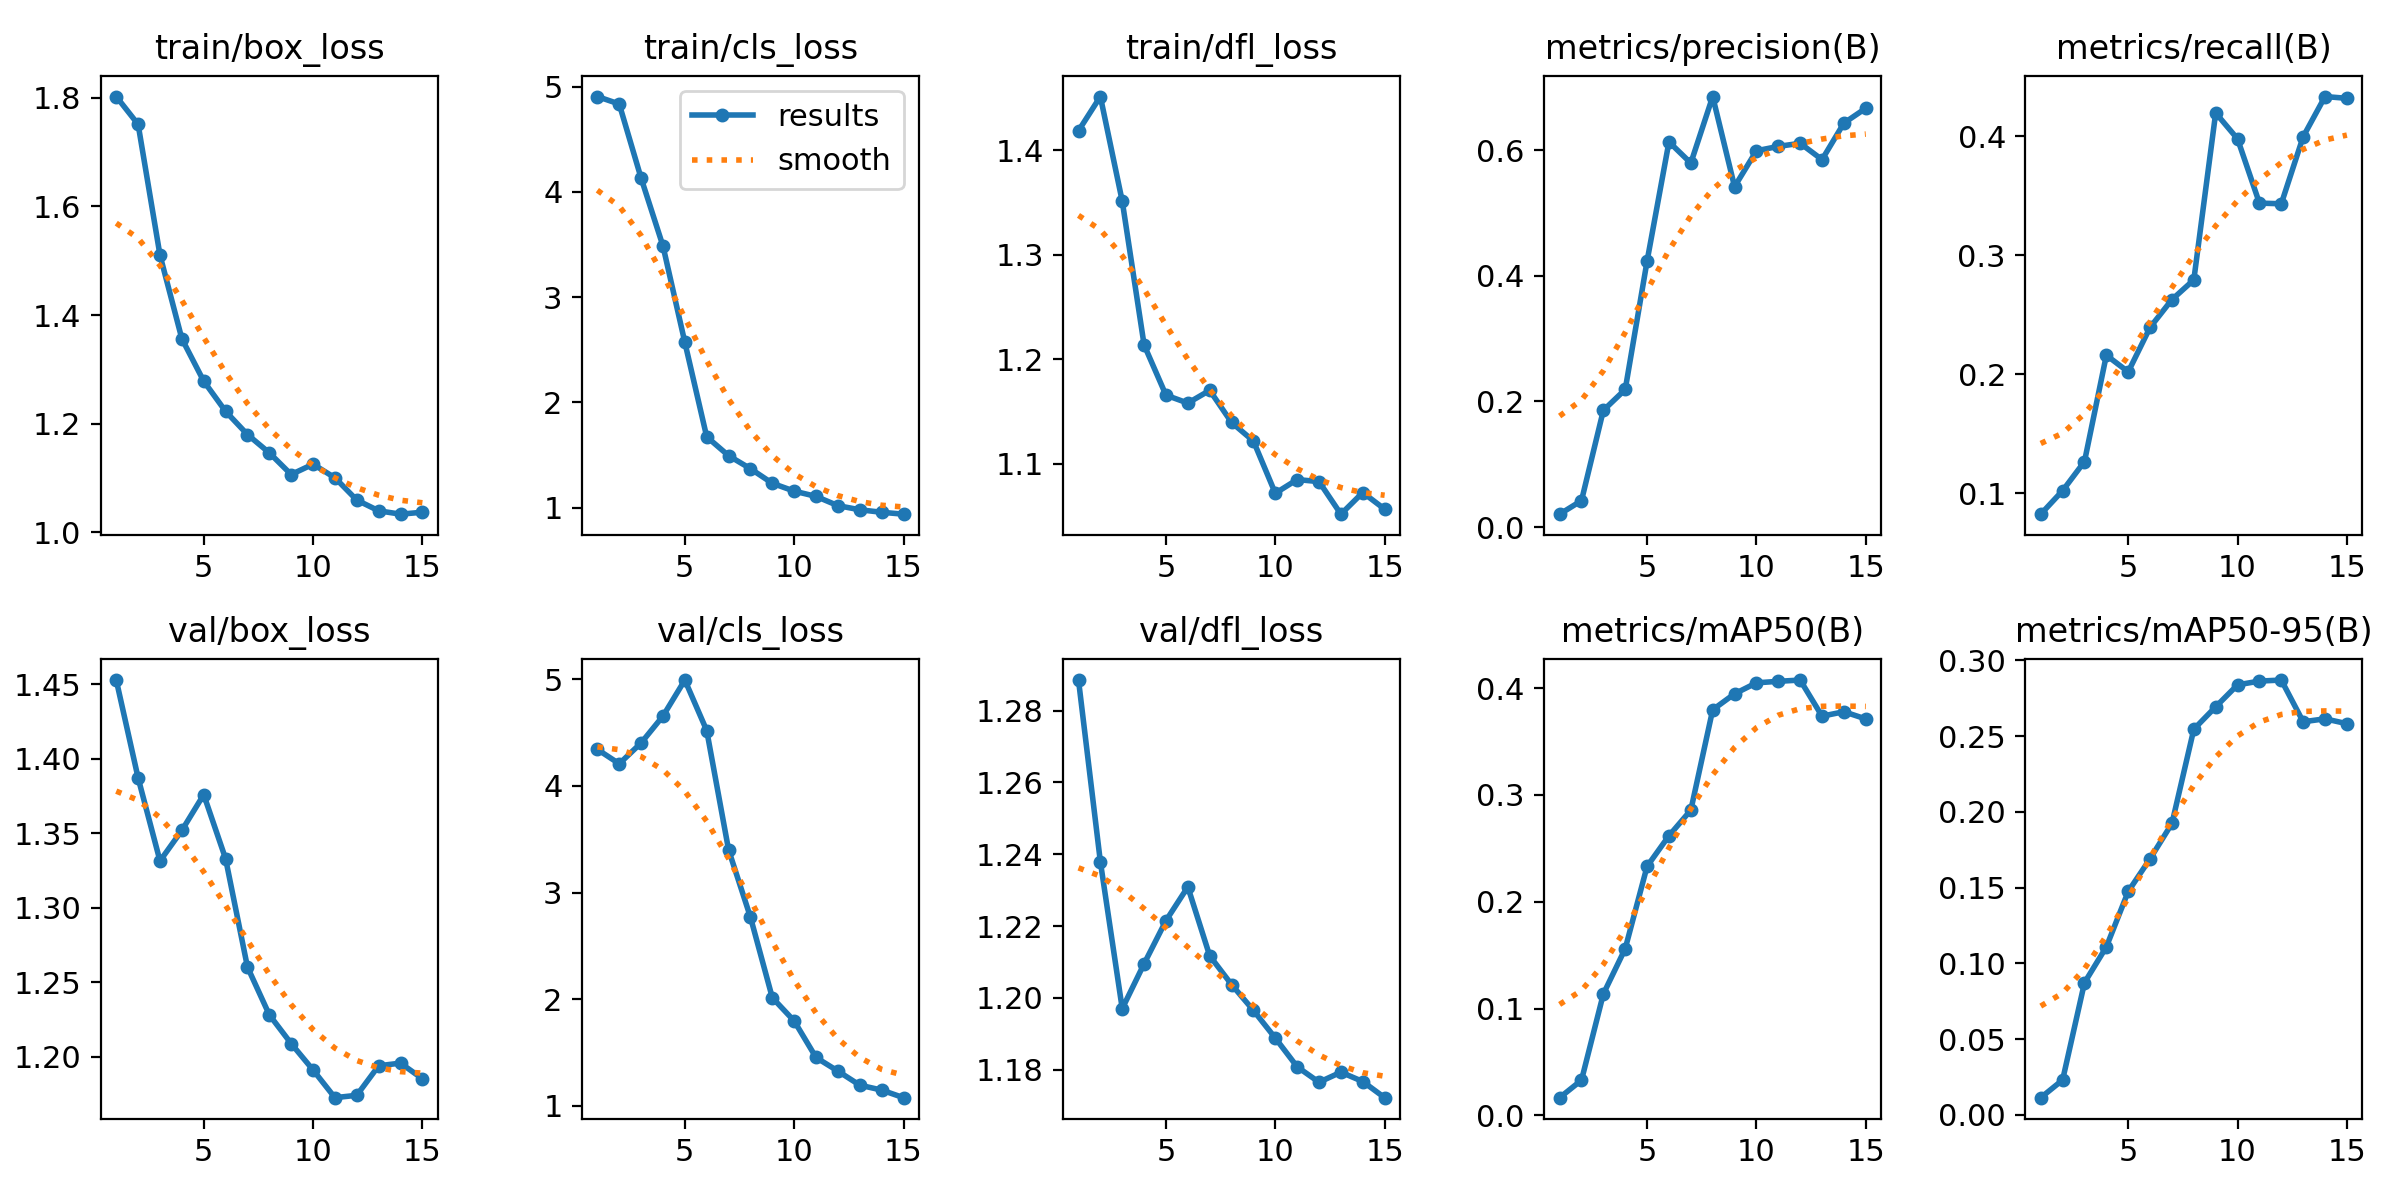

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [24]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Workspace\\TreasureHunter\\treasure-hunter-train\\datasets/runs/detect/train/weights.pt'